In [25]:
import numpy as np
import pint
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot
from pint import Quantity
from scipy import constants
from scipy.constants import physical_constants

In [26]:
si = pint.UnitRegistry()

Q_ = si.Quantity
si.formatter.default_format = "~P"
si.setup_matplotlib()

In [27]:
def rho(p, R, T) -> Quantity:
    return p / (R * T)


R_str = Q_(*physical_constants["molar gas constant"][:2])
Md = Q_(28.966, "g/mol")


rho_air = rho(
    p=Q_(1000, "hPa"),
    R=R_str / Md,
    T=Q_(300, "K"),
)

print(f"{rho_air.to_base_units():.3g~P} = {rho_air.to(si.g / si.cm**3):.3g~P}\n")

1.16 kg/m³ = 0.00116 g/cm³



AttributeError: 'Figure' object has no attribute 'endswith'

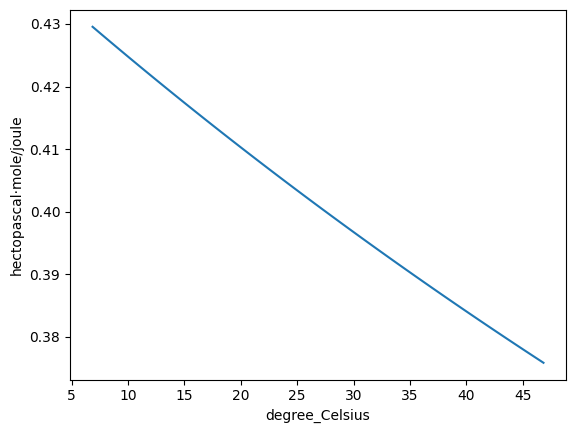

In [30]:
fig, ax = plt.subplots()
T = Q_(np.linspace(280, 320), "K")

ax.plot(T, rho(Q_(1000, "hPa"), R_str, T))
ax.xaxis.set_units(si.celsius)
show_plot(fig)

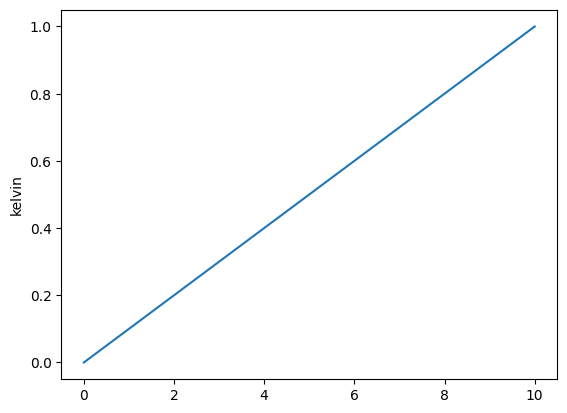

In [29]:
a = np.linspace(0, 1, 11, dtype=np.float64)
b = Q_(a, "K")
plt.plot(b)